# Classificação de Autismo: Análise de Distâncias Faciais

Este notebook tem como objetivo classificar o autismo com base em medições de distâncias faciais. Usaremos conjuntos de dados contendo distâncias calculadas a partir de marcos faciais para indivíduos com e sem autismo. A classificação será realizada utilizando os algoritmos K-Nearest Neighbors (KNN) e Random Forest.

## Tabela de Conteúdos

1. [Importação de Bibliotecas](#importação-de-bibliotecas)
2. [Carregamento dos Dados](#carregamento-dos-dados)
3. [Pré-processamento de Dados](#pré-processamento-de-dados)
4. [Análise Exploratória de Dados](#análise-exploratória-de-dados)
5. [Treinamento e Avaliação do Modelo](#treinamento-e-avaliação-do-modelo)
   - [K-Nearest Neighbors (KNN)](#k-nearest-neighbors-knn)
   - [Classificador Random Forest](#classificador-random-forest)


### Importando bibliotecas


In [16]:
#importação-de-bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier


### Carregamento de dados

Carregar os conjuntos de dados contendo as distâncias faciais para indivíduos com e sem autismo.


In [64]:
# Carregar os conjuntos de dados
df_no_autism = pd.read_csv("../../data/preprocessed_landmark/distances_no_autism.csv")
df_with_autism = pd.read_csv("../../data/preprocessed_landmark/distances_with_autism.csv")

# Combinar os conjuntos de dados
data_total = pd.concat([df_no_autism, df_with_autism], ignore_index=True)


### Pré-processamento de Dados

Padronizar as características relevantes para melhorar o desempenho dos modelos de aprendizado de máquina.


In [3]:
# Pré-processar os dados
standardScaler = StandardScaler()

# Selecionar colunas a serem padronizadas (atualize com base nas suas colunas de distância)
columns_to_scale = ['middle_facial_height', 'lower_facial_height', 
                    'philtrum', 'intercanthal_width', 'biocular_width', 'nasal_width', 'mouth_width']

data_total[columns_to_scale] = standardScaler.fit_transform(data_total[columns_to_scale])


### Análise Exploratória de Dados

Análise exploratória inicial para entender melhor o conjunto de dados.


      samples  class  middle_facial_height  lower_facial_height   philtrum  \
0         2.0    0.0             68.860080            64.215279  11.517276   
1         3.0    0.0             59.252244            59.872557  11.582057   
2         5.0    0.0             62.921942            64.045623  16.938434   
3         6.0    0.0             71.221977            88.406517  16.209815   
4         7.0    0.0             70.226914            72.062740  15.425547   
...       ...    ...                   ...                  ...        ...   
2290   1462.0    1.0             58.200104            87.988474   8.866916   
2291   1463.0    1.0             62.557028            69.727392   6.829671   
2292   1465.0    1.0             66.044913            74.129316  16.209898   
2293   1466.0    1.0             61.645033            67.164645  11.523762   
2294   1468.0    1.0             64.065013            53.217367  10.529829   

      intercanthal_width  biocular_width  nasal_width  mouth_wi

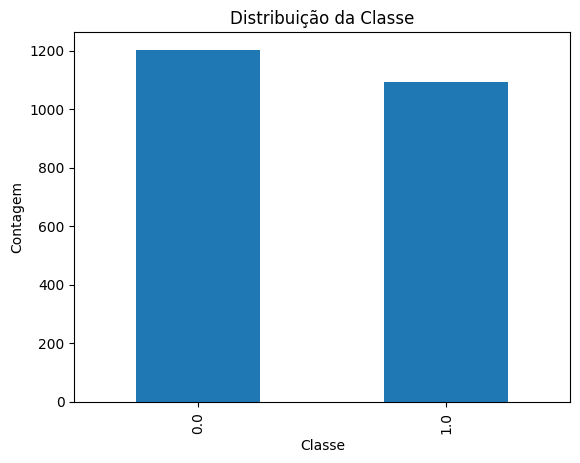

In [65]:
# Verificar a distribuição da variável alvo
data_total['class'].value_counts().plot(kind='bar', title='Distribuição da Classe')
plt.xlabel('Classe')
plt.ylabel('Contagem')

# Removendo linhas onde qualquer uma das colunas especificadas contém dados nulos
data_total_cleaned = data_total.dropna(subset=columns_to_scale)
data_total_cleaned[columns_to_scale] = data_total_cleaned[columns_to_scale].abs()

# Para verificar o resultado
print(data_total_cleaned)

In [71]:
# Calcular a correlação entre as variáveis numéricas e a variável de saída 'class'
correlation_matrix = data_total_cleaned.corr()

# Exibir a correlação da variável 'class' com as outras
correlation_with_class = correlation_matrix['class'].sort_values(ascending=False)

# Mostrar a correlação
print(correlation_with_class)



class                   1.000000
samples                 0.040086
lower_facial_height    -0.065793
philtrum               -0.169624
mouth_width            -0.171513
nasal_width            -0.182352
middle_facial_height   -0.250896
intercanthal_width     -0.252322
biocular_width         -0.278372
Name: class, dtype: float64


### Treinamento e Avaliação do Modelo

#### K-Nearest Neighbors (KNN)

Treinar um classificador KNN e avaliar seu desempenho usando validação cruzada.


      middle_facial_height  lower_facial_height   philtrum  \
0                68.860080            64.215279  11.517276   
1                59.252244            59.872557  11.582057   
2                62.921942            64.045623  16.938434   
3                71.221977            88.406517  16.209815   
4                70.226914            72.062740  15.425547   
...                    ...                  ...        ...   
2290             58.200104            87.988474   8.866916   
2291             62.557028            69.727392   6.829671   
2292             66.044913            74.129316  16.209898   
2293             61.645033            67.164645  11.523762   
2294             64.065013            53.217367  10.529829   

      intercanthal_width  biocular_width  nasal_width  mouth_width  
0              55.286244      130.963019    44.366332    91.299925  
1              48.986551      120.427291    38.561207    84.758111  
2              51.150772      118.002091    38.8

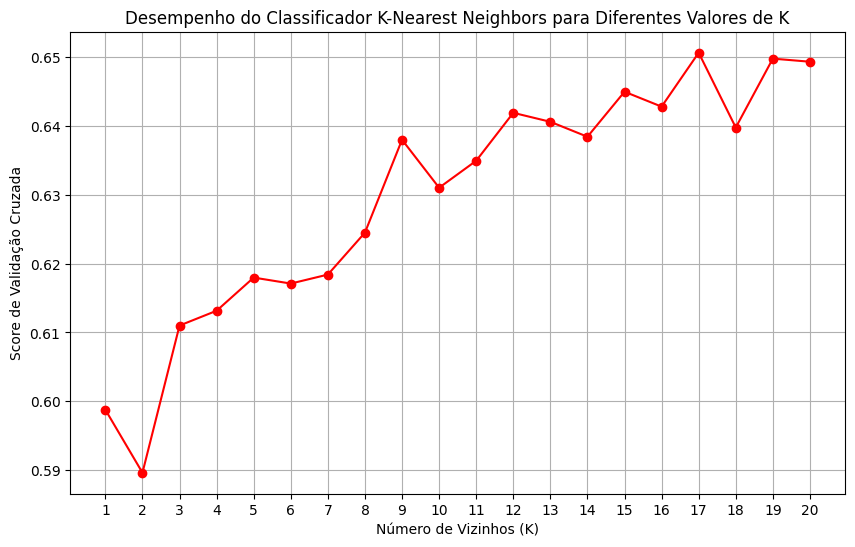

In [66]:
# Dividir os dados em características e variável alvo
y = data_total_cleaned['class']
 # Remover as colunas 'class' e 'samples'
X = data_total_cleaned.drop(['class', 'samples'], axis=1)

print(X)
# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo KNN
knn_scores = []
for k in range(1, 21):
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn_classifier, X, y, cv=10)
    knn_scores.append(score.mean())

# Plotar os resultados
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), knn_scores, color='red', marker='o')
plt.title('Desempenho do Classificador K-Nearest Neighbors para Diferentes Valores de K')
plt.xlabel('Número de Vizinhos (K)')
plt.ylabel('Score de Validação Cruzada')
plt.xticks(range(1, 21))
plt.grid()
plt.show()


#### Classificador Random Forest

Treinar um classificador Random Forest e avaliar seu desempenho.


In [67]:
# Treinar o modelo Random Forest
randomforest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_score = cross_val_score(randomforest_classifier, X, y, cv=10)
print("Score do Random Forest: ", rf_score.mean())

Score do Random Forest:  0.6541370799316499


#### Classificador CNN

Treinar um classificador Rede Neural Convolucional e avaliar seu desempenho.


### Tentativa utilizando apenas dados mais correlacionados

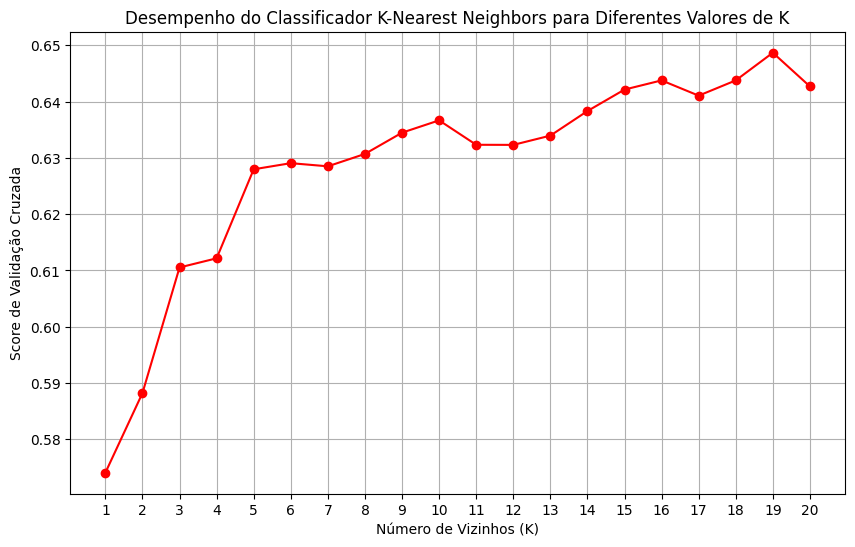

Desempenho do modelo KNN com K=1 no conjunto de teste: 0.5948


In [72]:
# Selecionar as três variáveis mais correlacionadas com a classe
selected_features = ['biocular_width', 'intercanthal_width', 'middle_facial_height']

# Dividir os dados em características (X) e variável alvo (y)
y = data_total_cleaned['class']
X = data_total_cleaned[selected_features]  # Apenas as variáveis selecionadas

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo KNN
knn_scores = []
for k in range(1, 21):
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn_classifier, X_train, y_train, cv=10)  # Usar apenas o conjunto de treinamento
    knn_scores.append(score.mean())

# Plotar os resultados
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), knn_scores, color='red', marker='o')
plt.title('Desempenho do Classificador K-Nearest Neighbors para Diferentes Valores de K')
plt.xlabel('Número de Vizinhos (K)')
plt.ylabel('Score de Validação Cruzada')
plt.xticks(range(1, 21))
plt.grid()
plt.show()

# Testar com K=1 (melhor resultado)
best_k = 1
knn_classifier = KNeighborsClassifier(n_neighbors=best_k)
knn_classifier.fit(X_train, y_train)

# Avaliar o desempenho no conjunto de teste
test_score = knn_classifier.score(X_test, y_test)
print(f"Desempenho do modelo KNN com K={best_k} no conjunto de teste: {test_score:.4f}")


In [73]:
# Treinar o modelo Random Forest
randomforest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_score = cross_val_score(randomforest_classifier, X, y, cv=10)
print("Score do Random Forest: ", rf_score.mean())

Score do Random Forest:  0.6249477881146762
